### Prediction of Loan Repayment

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), build a model that can predict wether or not a borrower will pay back their loan, and  find the most important features used to build the model. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan, and also find which features to consider if they are to grant loan to a potential client. 



### Data Overview

Here is the information on this data set from kaggle:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
---
-

### Outline of tasks
[Import The Libraries and Data For The Tasks](#Import-the-Libraries-for-the-tasks)

[Explore The Overview of The Data](#Explore-the-overview-of-the-data)

[Exploratory Data Analysis and Feature Selection of Numeric Data Types](#Exploratory-Data-Analysis-and-feature-selection-of-numeric-data-types)

[Exploratory Data Analysis and Feature Selection of Object Data Types](#Exploratory-data-analysis-and-feature-selection-of-object-data-types)

[Dealing with Missing Values](#Dealing-with-Missing-Values)

[Prepare The Data For Modeling](#Prepare-the-data-for-modeling)

[Creating The Machine Learning Models](#Creating-the-machine-learning-models)

[Finding The Important Features](#Finding-the-Important-features-from-the-best-model)

[Making Predictions Using The Model](#Make-prediction-using-the-best-model)

[Summary](#Summary)

## Import the Libraries and Data for the tasks

In [1]:
# IMPORTING THE PRIMARY LIBRARIES FOR PROJECT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
%matplotlib inline

In [2]:
# Import the machine learning algorithms packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Import the packages for the performance metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score, f1_score

# Import the package for the gridsearch
from sklearn.model_selection import GridSearchCV

#### Import The Data

In [4]:
# IMPORTING THE DATA AND VIEW ONLY THE FIRST FIVE ROWS
df = pd.read_csv('lending_club_loan_two.csv')
# Observe the first five observations of the data fram.
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
# make a copy of the data frame and use the copy for the project whiles the original will be reserved
lend = df.copy()

### Explore the overview of the data
[Return to outline of tasks](#Outline-of-tasks)

In [6]:
# Find the general information of the dataset
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

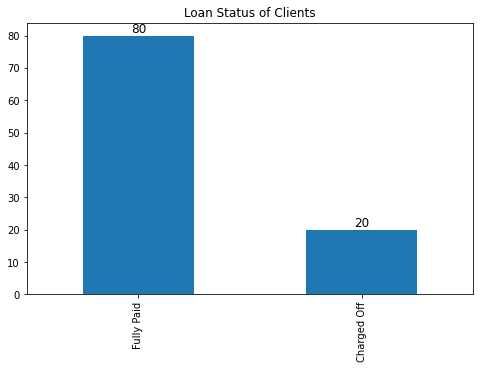

In [7]:
# Examine the loan_status column which is the label
annot = (lend["loan_status"].value_counts(normalize=True)*100).round().plot(kind="bar",
                                                                            figsize=(8,5), title="Loan Status of Clients")

# Annotate the bars
annot.bar_label(annot.containers[0],size=12)
plt.show()

From the above bar graph, those who fully paid back their loan constitute 80% of the total number of clients who borrowed from Lending Club. This means that the accuracy of the model would be at least 80%. This is misleading because the model will predict 80% of the time, that the prospective borrower would pay back the loan which is not always the case. To handle this issue, I will reduce the number of clients who fully paid back their loan to the number of those who didn't. 

In [8]:
# Let find the actual number of those who paid back and those who didn't
lend['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

Thus, 318,357 of the clients fully paid back their loan whiles 77,673 didn't pay back their loan.

##### Reduce the number  of those who full paid to those the number of those who charged off (defaulted)

In [9]:
# First let me extract those who fully paid from the lend data set and store it fully_paid
fully_paid = lend.query('loan_status=="Fully Paid"')

# Let me also extract those who didn't pay back their loan and store it as charged off 
charged_off = lend[lend["loan_status"]=="Charged Off"]

# Now divide the total number of those who charge off which is 77,673 by the number of those who fully paid.
print(100*len(charged_off)/(len(fully_paid)))

# Reduce the number of those who paid their loan by 24.398% and store it as new_fully_paid
new_fully_paid = fully_paid.sample(frac=0.24398)

# Now let me put the new_fully_paid and charged off data together and name it lend
lend = pd.concat([charged_off,new_fully_paid],axis=0)


24.398081399183933


##### Now Let verify if the number those who fully paid their loan has reduced

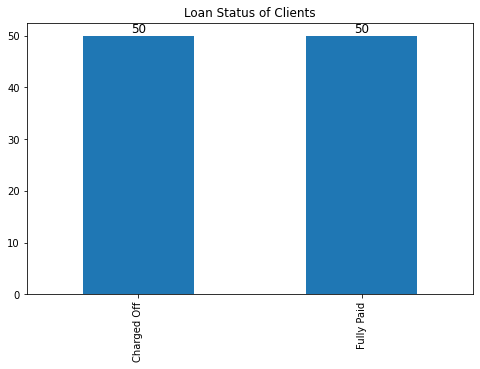

In [10]:
# Reaxamine the loan_status column which is the label
annot = (lend["loan_status"].value_counts(normalize=True)*100).round().plot(kind="bar",
                                                                            figsize=(8,5), title="Loan Status of Clients")

# Annotate the bars
annot.bar_label(annot.containers[0],size=12)
plt.show()

Thus, the accuracy score for the model wouldn't be misleading since both those who charged off and fully paid are the same;50% each. 

## Exploratory Data Analysis and feature selection of numeric data types
[Return to outline of tasks](#Outline-of-tasks)

In [11]:
# Create a function that will select columns with numeric data types
def numeric(x):
    
    return x.select_dtypes(np.number)

In [12]:
# Select the columns with numeric data types
numeric(lend)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
25,6000.0,11.36,197.47,46680.0,6.56,9.0,0.0,4370.0,40.1,10.0,NaN,0.0
26,8400.0,13.35,284.45,35000.0,23.08,6.0,0.0,6953.0,74.8,17.0,0.0,0.0
36,3250.0,16.78,115.52,22500.0,18.76,7.0,0.0,7587.0,54.6,7.0,0.0,0.0
41,28000.0,19.91,312.04,52000.0,20.70,10.0,0.0,29178.0,87.6,16.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72511,5000.0,9.16,159.38,64000.0,19.20,10.0,0.0,30414.0,61.1,35.0,3.0,0.0
63763,20975.0,16.99,521.18,66500.0,16.19,7.0,0.0,8426.0,80.2,27.0,3.0,0.0
387297,26400.0,7.26,818.30,105000.0,24.28,22.0,0.0,52051.0,64.1,38.0,2.0,0.0
227231,5000.0,8.49,157.82,90000.0,17.24,17.0,0.0,3301.0,25.4,22.0,NaN,0.0


In [13]:
# Change charge off and fully paid to 0 and 1 respectively
lend["loan_status"] = lend["loan_status"].map({"Charged Off":0, "Fully Paid":1})


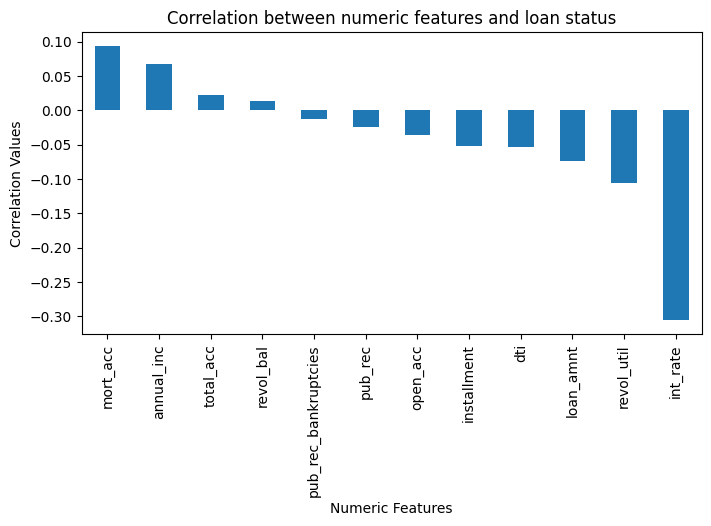

In [14]:
# Find the correlation of the loan status column with the features with numeric data types, and store it as correlation
correlation = lend.corr()["loan_status"].sort_values(ascending=False)

# Create an empty figure and increase the size.
plt.figure(figsize=(8,4),dpi=100)

# Plot correlation in a bar graph
correlation[1:].plot(kind="bar")

# Give name to the x-axis
plt.xlabel("Numeric Features")

# Give name to the y-axis
plt.ylabel("Correlation Values")

# Title the graph
plt.title("Correlation between numeric features and loan status")
# show the diagram
plt.show()


1. Thus, the interest rate of the loan has the highest correlation with the loan status followed by revolving utilization rate (revol_util), followed by number of mortage account (mort_acc) with the least being number of public record bankruptcies bankrupt (pub_rec_bankruptcies).

2. Features such as interest rate, Revolving Utilization Rate(revol_util), dti, loan amount(loan_amount), installment, open_acc and public record bankruptcies (pub_rec_bankruptcies) all have negative correlation with the Fully paid (1). This means, the higher value of any of them, the lower the chance of the borrower paying back his loan, and the vice versa. However, features such as revol_bal, total_acc, annual_inc and mort_acc have positive correlation with loan status implying that when any of them increases in value, the higher the chance of the borrower paying fully the loan, and vice versa.

##### Create a heatmap for the columns with numeric data types to find out multicolinearity

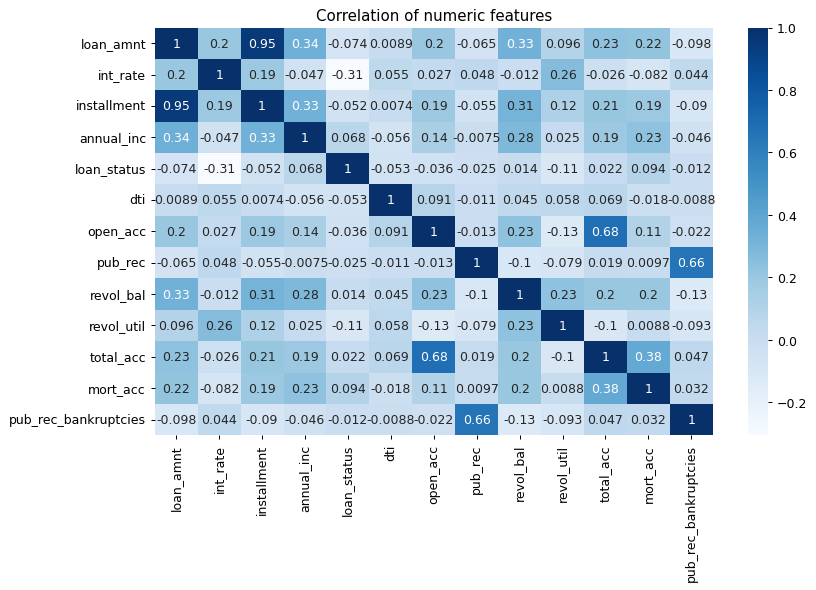

In [15]:
# Create a figure and increase the size
plt.figure(figsize=(10,6),dpi=90)
sns.heatmap(lend.corr(),annot=True, cmap="Blues")

# title the heatmap
plt.title("Correlation of numeric features")

plt.show()

From the heatmap, we can see that installment and loan amount are highly correlated. They are collinear, thus one has to be removed.

In [16]:
# Drop the loan amount column

lend = lend.drop("loan_amnt",axis=1)

## Exploratory data analysis and feature selection of object data types
[Return to Outline of tasks](#Outline-of-tasks)

In [17]:
# Find the columns with object data types
lend.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')


##### Create a function with name explore, which will give summary of  the objective data types and their categories with visualization


In [18]:

def explore(df,col,label="loan_status"):
    '''
    This function returns the summary of the categorical variables,
    and also displays the visual of the various categories in each categorical object column.
    It takes two keyword arguements which are df and col.
    df: Dataframe
    col: The column with object data type.
    '''
    unique_items = df[col].nunique()
#     ordered_col =sorted(df[col].unique()) 
    if unique_items <= 4:
        print("-------------------------------------------------")
        print(f"There are {df[col].nunique()} unique items in the {col} column.")
        print("The unique items and their respective counts are:"+"\n",(df[col].value_counts()))
        print("-------------------------------------------------")
        print()
        
        # Create an empty figure and name increase its size
        plt.figure(figsize=(5,5),dpi=90)
        # plot the graph
        annot = sns.countplot(data=df, x=col, hue=label)
        # Give title to the graph
        plt.title(f"Unique items in {col} given {label}")
        # annotate the bars
        for container in annot.containers:
            annot.bar_label(container)
        plt.legend(loc=(1.02,.85))
        # show the graph
        plt.show()
    else:
        print()
        print("-------------------------------------------------")
        print(f"There are {df[col].nunique()} unique items in the {col} column.")
        print("The unique items and their respective counts are:"+"\n",(df[col].value_counts()))
        print("-------------------------------------------------")
        
        # Create an empty figure and name increase its size
        plt.figure(figsize=(9,5),dpi=90)
        # plot the graph
        annot = sns.countplot(data=df, y=col, hue=label)
        # Give title to the graph
        plt.title(f"Unique items in {col} given {label}")
        # annotate the bars
        for container in annot.containers:
            annot.bar_label(container)
        # show the graph
        plt.legend(loc=(1.02,0.85))
        plt.show()
        

#### Term

-------------------------------------------------
There are 2 unique items in the term column.
The unique items and their respective counts are:
  36 months    109541
 60 months     45805
Name: term, dtype: int64
-------------------------------------------------



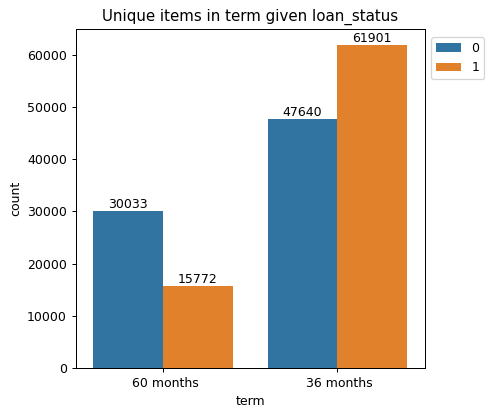

In [19]:
explore(lend,"term")

From the above summary, 30,033 clients who had 60 months to repay their loan turned out to charged off whiles only 15,693 fully paid back. Contrary to the 36 months term, 61,980 clients fully paid their loan whiles 47,640 charged off.

#### Grade


-------------------------------------------------
There are 7 unique items in the grade column.
The unique items and their respective counts are:
 C    42871
B    39331
D    29329
A    18730
E    16559
F     6690
G     1836
Name: grade, dtype: int64
-------------------------------------------------


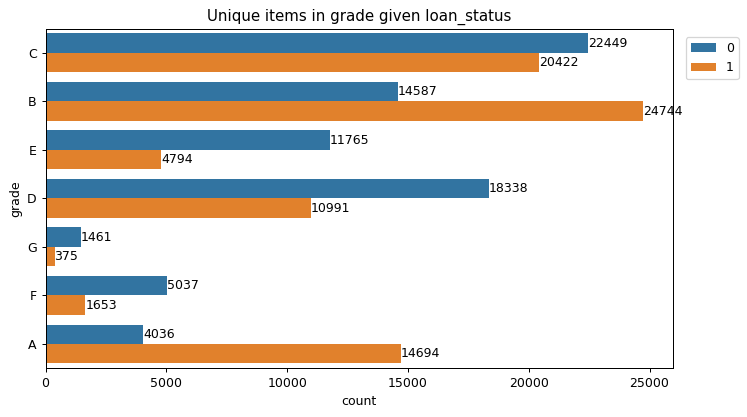

In [20]:
explore(lend,"grade")

The grouped bar graph indicates that 14,716 clients with assigned grade A fully paid their loan whiles 4,036 charged off. Also, 24,553 of clients with assigned grade B fully paid their loans whiles 14,587 of them charged off. However, more of clients with assigned grade C to G charged off in each assigned grade than those who fully paid.

#### sub_grade

B3    9034
C2    8936
B4    8855
C1    8807
C3    8736
C4    8584
B5    7972
C5    7808
B2    7325
D1    7122
D2    6339
B1    6145
A5    5787
D3    5577
D4    5566
D5    4725
A4    4654
E1    4020
E2    3847
E3    3293
A3    3032
E4    2921
A2    2703
A1    2554
E5    2478
F1    1888
F2    1558
F3    1320
F4    1071
F5     853
G1     619
G2     454
G3     340
G4     226
G5     197
Name: sub_grade, dtype: int64


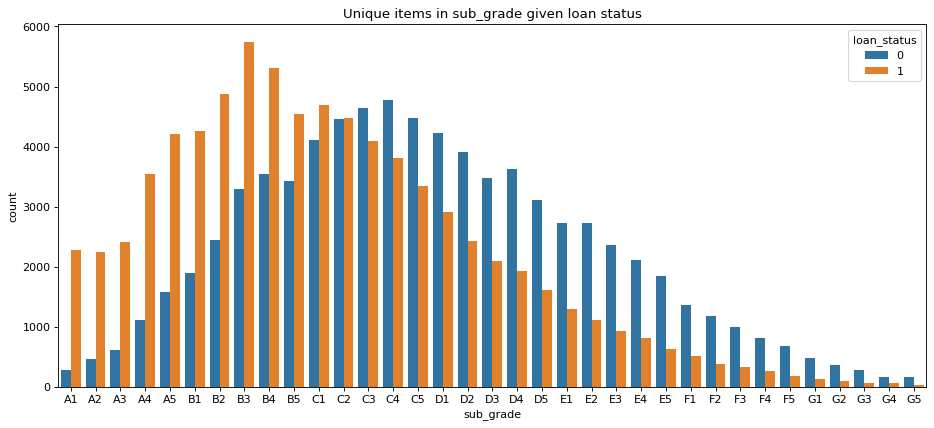

In [21]:
# Find the number of each unique item in sub_grade
print(lend["sub_grade"].value_counts())

# Create an empty figure and increase its size
plt.figure(figsize=(14,6),dpi=80)

# Create a groubed bar graph for the sub_grade
sns.countplot(data=lend,x ="sub_grade", order = sorted(lend['sub_grade'].unique()),hue="loan_status")
plt.title("Unique items in sub_grade given loan status")
plt.show()

The bag graph indicates clients assigned with grade A1 - C1 fully paid their loans whiles those assigned with C2 - G5 Charged off. Since the sub_grade provides almost the same information as Grade, I will remove grade from the data set.

In [22]:
# Remove sub_grade column from the data set
lend = lend.drop("grade", axis=1)

In [23]:
lend.select_dtypes('object').columns

Index(['term', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

#### Emp_title

In [24]:
# find the number of unique it
print("The job title(emp_title) has {} unique items.".format(lend["emp_title"].nunique()))

The job title(emp_title) has 76505 unique items.


The emp_title has so many unique items, it will thus be removed from the data set

In [25]:
# Remove the emp_title 
lend = lend.drop('emp_title',axis=1)

#### Emp_length
[Return to outline of tasks](#Outline-of-tasks)


-------------------------------------------------
There are 11 unique items in the emp_length column.
The unique items and their respective counts are:
 10+ years    48262
2 years      14051
< 1 year     12703
3 years      12427
5 years      10255
1 year       10205
4 years       9240
6 years       8159
7 years       8138
8 years       7565
9 years       6066
Name: emp_length, dtype: int64
-------------------------------------------------


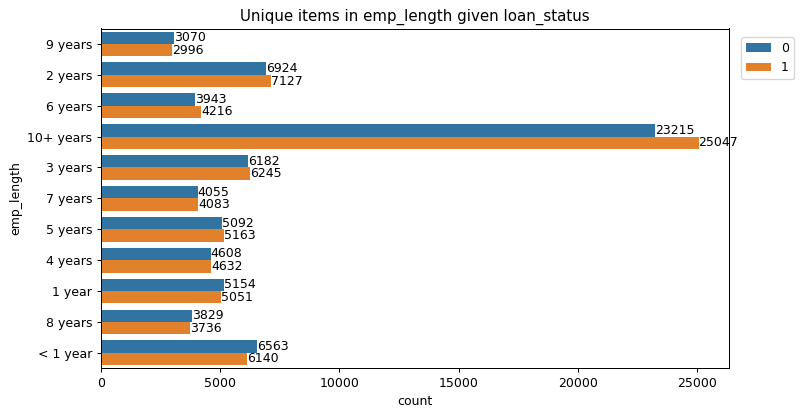

In [26]:
explore(lend,"emp_length")

From the above chart, more of those who have been employed for one year or less turn to charge off than those who fully paid. The clients who have been employeed for 10 years or more more of them fully paid their loan than those who charged off

#### Home Ownership
[Return to outline of task](#Outline-of-tasks)


-------------------------------------------------
There are 5 unique items in the home_ownership column.
The unique items and their respective counts are:
 MORTGAGE    73838
RENT        66313
OWN         15146
OTHER          35
NONE           14
Name: home_ownership, dtype: int64
-------------------------------------------------


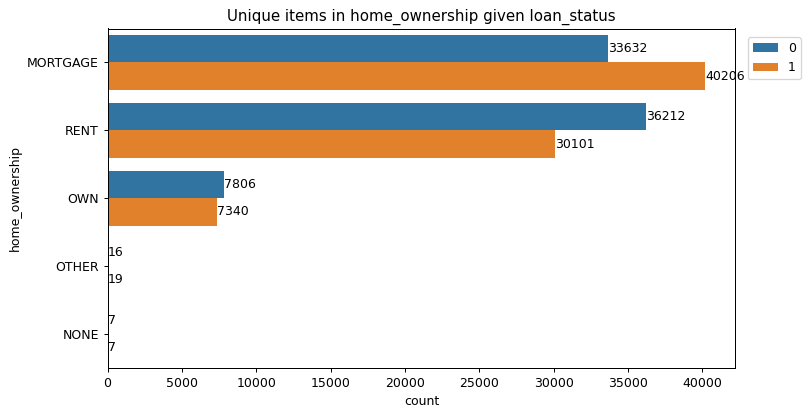

In [27]:
explore(lend,'home_ownership')

The above chart indicates majority of clients who mortgage their homes fully paid back their loans than those who rent their homes.

In [28]:
# Add other, none and any to mortage
lend["home_ownership"] = lend["home_ownership"].replace(["OTHER","NONE","ANY"],"MORTGAGE")

#### Verification Status

-------------------------------------------------
There are 3 unique items in the verification_status column.
The unique items and their respective counts are:
 Verified           57728
Source Verified    53360
Not Verified       44258
Name: verification_status, dtype: int64
-------------------------------------------------



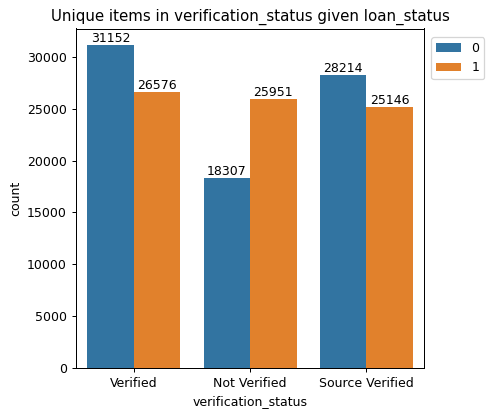

In [29]:
explore(lend,'verification_status')

The verification status chart shows that the clients who had their status not verified fully paid their loan than those who had verified status as well as those with source verified status.

#### (issue_d)
[Return to outline of tasks](#Outline-of-tasks)

In [30]:
lend['issue_d']

4         Apr-2013
25        Apr-2010
26        Jun-2014
36        Aug-2013
41        Dec-2011
            ...   
72511     Apr-2016
63763     Apr-2015
387297    Dec-2015
227231    Sep-2011
348725    May-2013
Name: issue_d, Length: 155346, dtype: object

In [31]:

# Create a function named date that will convert any date column from object to datetime
def date(x):
    return pd.to_datetime(x)
    

In [32]:
lend['issue_d']=lend['issue_d'].apply(date)
lend['issue_d']

4        2013-04-01
25       2010-04-01
26       2014-06-01
36       2013-08-01
41       2011-12-01
            ...    
72511    2016-04-01
63763    2015-04-01
387297   2015-12-01
227231   2011-09-01
348725   2013-05-01
Name: issue_d, Length: 155346, dtype: datetime64[ns]

In [33]:
# Extract only the month name from the issued month
lend['month_name']= lend['issue_d'].apply(lambda date:date.month_name())


-------------------------------------------------
There are 12 unique items in the month_name column.
The unique items and their respective counts are:
 October      16626
July         15866
January      13597
April        13240
November     13052
August       12791
May          12789
March        12593
June         11996
February     11415
December     10889
September    10492
Name: month_name, dtype: int64
-------------------------------------------------


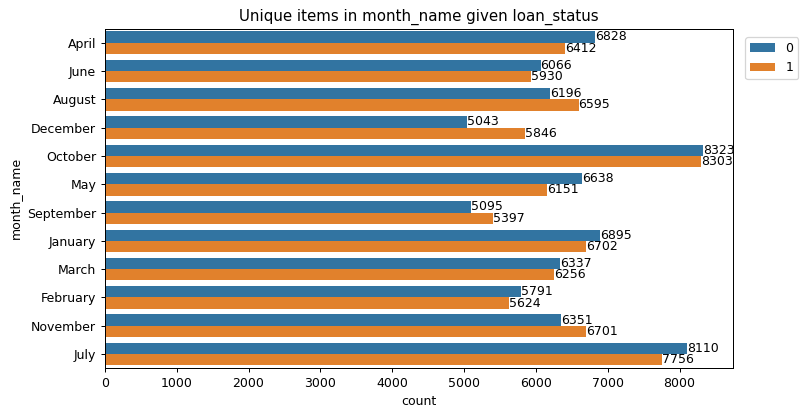

In [34]:
# Find the number of loans given in each month
explore(lend, "month_name")

Since the month in which a client is given a loan does not affect his/her ability to repay, the month inwhich the loan was granted will be removed from the dataset.

In [35]:
# Remove the issue_d and month_name from the data set
lend=lend.drop(["issue_d","month_name"],axis=1)

In [36]:
# Let me check to find out the columns of the object data types again
lend.select_dtypes("object").columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Purpose


-------------------------------------------------
There are 14 unique items in the purpose column.
The unique items and their respective counts are:
 debt_consolidation    94117
credit_card           30572
home_improvement       8966
other                  8598
major_purchase         3278
small_business         2665
medical                1713
car                    1607
moving                 1181
vacation                945
house                   880
wedding                 598
renewable_energy        137
educational              89
Name: purpose, dtype: int64
-------------------------------------------------


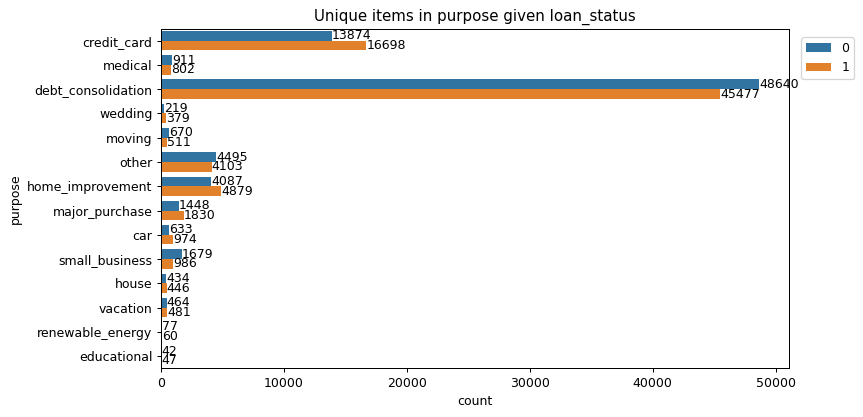

In [37]:
#Find the summary of purpose column
explore(lend, "purpose")

The bar graph for purpose column indicates more clients who got loans for credit card purpose paid back their loans than those who charged off at 16,818 and 13,874 respectively. Those who got loans for home improvement purpose had majority (4836) pay back their loan than those who charged off (4087). However, those who got loans for debt consolidation purpose had more people charging off (48,640) than those who fully paid (45,334).

since those who got loan for educational, vacation, renewable energy, car, moving and wedding are small in number, I will add them to the other category. I will also madd house to home improvement.

In [38]:
lend['purpose'] = lend['purpose'].replace(["educational","vacation","car","moving","wedding"],"other")

# Add house to home improvement
lend["purpose"] = lend['purpose'].replace("house", "home_improvement")

# Add renewable energy to major purchase
lend['purpose'] = lend['purpose'].replace("renewable_energy","major_purchase")

#### Title

In [39]:
# Find the number of unique items in the title column
lend['title'].nunique()

20179

Since the title column has so many categories (20,276), the title will be removed as well

In [40]:
# Remove the title column from the data set
lend = lend.drop("title",axis=1)

#### earliest_cr_line
[Return to outline of tasks](#Outline-of-tasks)

In [41]:
lend['earliest_cr_line']

4         Mar-1999
25        Oct-2003
26        Jun-2004
36        Jun-2009
41        Dec-1988
            ...   
72511     Jul-2000
63763     Dec-1996
387297    May-2004
227231    Sep-2001
348725    Feb-1993
Name: earliest_cr_line, Length: 155346, dtype: object

In [42]:
# Convert the object data type to datetime
lend['earliest_cr_line']=lend['earliest_cr_line'].apply(date)
lend['earliest_cr_line']

4        1999-03-01
25       2003-10-01
26       2004-06-01
36       2009-06-01
41       1988-12-01
            ...    
72511    2000-07-01
63763    1996-12-01
387297   2004-05-01
227231   2001-09-01
348725   1993-02-01
Name: earliest_cr_line, Length: 155346, dtype: datetime64[ns]

In [43]:
# Extract the year from the earliest_cr_line and replace it to earliest_cr_line
lend['earliest_cr_line']=lend['earliest_cr_line'].apply(lambda date:date.year)

In [44]:
# Let me check to find out the columns of the object data types again
lend.select_dtypes("object").columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### initial_list_status

-------------------------------------------------
There are 2 unique items in the initial_list_status column.
The unique items and their respective counts are:
 f    92949
w    62397
Name: initial_list_status, dtype: int64
-------------------------------------------------



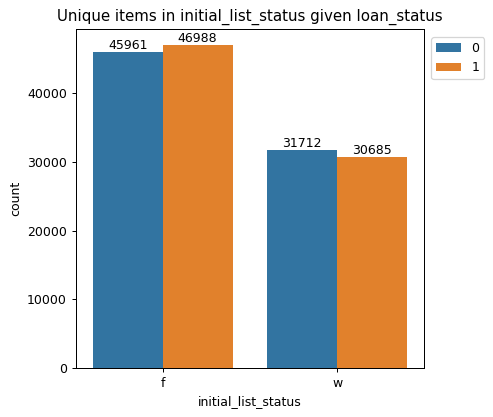

In [45]:
explore(lend,'initial_list_status')

The initial list status summary shows  those who were listed f turned to have more people (46,837) paying back their loan than those who charged off at 45961. Those with initial listing of W had slightly more people (31,712) charging off than those who fully paid at 30836.

#### application_type

-------------------------------------------------
There are 3 unique items in the application_type column.
The unique items and their respective counts are:
 INDIVIDUAL    155068
DIRECT_PAY       146
JOINT            132
Name: application_type, dtype: int64
-------------------------------------------------



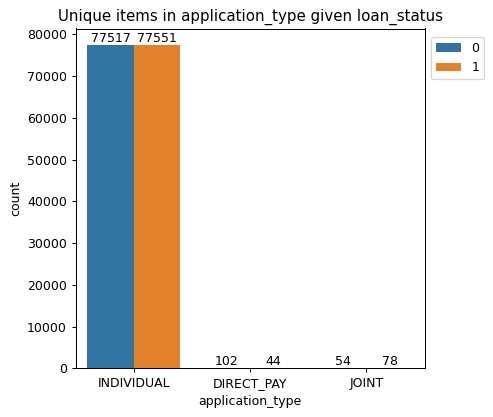

In [46]:
explore(lend, "application_type")

From the above summary, majority (155,050) of the clients went in for the loan individually whiles 150 of them went in as joint group and 146 of them applied as direct pay. Those who went for the loans individually had slightly more people (77,533) fully paying their loans than those who charged off. Also, 96 of those who applied as joint fully paid the loan as against 54 who charged off. However, 102 of those who applied as Direct Pay charged off whiles 44 of them fully paid.

#### Address

In [47]:
# Have a look of the address column
lend["address"]

4                    679 Luna Roads\r\nGreggshire, VA 11650
25        44130 Powers Course Suite 880\r\nEast Preston,...
26                       Unit 3166 Box 1862\r\nDPO AE 48052
36              361 Erica Forest\r\nLake Mariaton, TN 30723
41        5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...
                                ...                        
72511     242 Kimberly Mountain Apt. 204\r\nEast Thomas,...
63763                    Unit 1131 Box 3732\r\nDPO AP 30723
387297           16693 Payne Knolls\r\nPort Jacob, PA 05113
227231                            USS Young\r\nFPO AE 29597
348725                309 Deleon Park\r\nLisabury, UT 29597
Name: address, Length: 155346, dtype: object

In [48]:
# Now let me extract the state from the given address and store it as state
lend['state']=lend["address"].str.split(',').str.get(1).str.lstrip().str.split(" ").str.get(0).str.lstrip().str.rstrip()

In [49]:
# Find the number of unique categories in the state column
lend['state'].nunique()

52

52 unique categories in the state column are so many to be included in the model.

In [50]:
# Remove state and address from the data set
lend = lend.drop(["address","state"],axis=1)

In [51]:
# Find the columns with object data types left for the next data preprocessing
lend.select_dtypes("object").columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

## Dealing with Missing Values
[Return to outline of task](#Outline-of-tasks)

In [52]:
# Find the number of missing values in each column
lend.isna().sum()

term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length               8275
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                120
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                13453
pub_rec_bankruptcies      207
dtype: int64

In [53]:
# Find the percentage of the number of missing values
100*(lend.isna().sum()/len(lend)).sort_values(ascending=False)

mort_acc                8.660023
emp_length              5.326819
pub_rec_bankruptcies    0.133251
revol_util              0.077247
earliest_cr_line        0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
term                    0.000000
int_rate                0.000000
purpose                 0.000000
loan_status             0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
installment             0.000000
dti                     0.000000
dtype: float64

#### Dealing with missing values in the pub_rec_bankruptcies  and revol_util columns 

In [54]:
# Remove the missing values 
lend.dropna(subset=['pub_rec_bankruptcies','revol_util'],inplace=True)

In [55]:
###### Dealing with missing values in emp_length

In [56]:
# find the percentage of the value counts of each category 
lend["emp_length"].value_counts(normalize=True).mul(100).round(2)

10+ years    32.84
2 years       9.56
< 1 year      8.62
3 years       8.45
5 years       6.98
1 year        6.92
4 years       6.28
6 years       5.55
7 years       5.54
8 years       5.14
9 years       4.13
Name: emp_length, dtype: float64

In [57]:
# Fill the missing values with 10+ years
lend['emp_length'] = lend["emp_length"].fillna("10+ years")

##### Dealing with missing values in mort_acc
Since the mort_acc has strong relationshiop with loan status, and the missing number is not up to 10% of the total number of rows, I will not remove it from the data set.

In [58]:
# Find the overvies of mort_acc
lend['mort_acc'].value_counts(normalize=True).mul(100).round(2)

0.0     41.67
1.0     16.83
2.0     13.57
3.0      9.98
4.0      7.26
5.0      4.71
6.0      2.83
7.0      1.52
8.0      0.76
9.0      0.40
10.0     0.20
11.0     0.11
12.0     0.07
13.0     0.03
14.0     0.02
15.0     0.01
16.0     0.01
17.0     0.01
19.0     0.00
20.0     0.00
18.0     0.00
22.0     0.00
21.0     0.00
26.0     0.00
23.0     0.00
32.0     0.00
24.0     0.00
Name: mort_acc, dtype: float64

In [59]:
# Fill the missing values in the mort_acc with 0
lend["mort_acc"] = lend['mort_acc'].fillna(0)

In [60]:
# Now Find the if there exist any missing values
lend.isna().sum()

term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## Prepare the data for modeling
[Return to outline of task](#Outline-of-tasks)

### Notice:
Since the data is huge for my computer to run the cross validation, I will choose only 25% of the of the lend data.

In [61]:
# select only 25% of the lend data and store it as lend
lend = lend.sample(frac=.25)

# Find the total number of rows and columns of the reduced data
lend.shape

(38755, 21)

In [62]:
# Define the features and store them as x
x= lend.drop('loan_status',axis=1)

# Define the label and store it as y
y = lend['loan_status']

In [63]:
# Convert the categorical data to dummy variables
x = pd.get_dummies(x,drop_first=True)

In [64]:
len(x.columns)

70

##### Split the data to train,validate and test

In [65]:
# Split the data to train and validation data
x_train,x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42,)

In [66]:
# Split the data to validation and test data
x_validation, x_test, y_validation, y_test = train_test_split(x_validation,y_validation, test_size=0.5,stratify=y_validation, random_state=42)

#### Scale the data


In [67]:
# Create an instantiation of the of the scaler
scale = StandardScaler()
# scale the train data
x_scaled_train = scale.fit_transform(x_train)

# scale the validation data
x_scaled_validation = scale.transform(x_validation)

# scale the test data
x_scaled_test = scale.transform(x_test)

In [68]:
# # Using the MinMaxscaler
# scaler = MinMaxScaler()

# x_scaler_train = scaler.fit_transform(x_train)

# x_scaler_validation = scaler.transform(x_validation)

# x_scaler_test = scaler.transform(x_test)

### Creating the machine learning models
[Return to outline of tasks](#Outline-of-tasks)

Since Decision Tree and ensemble methods do not need to be scaled, I will not scale the train data. I will be using decision tree and the ensemble methods since the objective is not only to find the best model but also to find the important features in determing the model used.

### Decision Tree Classifier 

In [69]:
# Instantiate the decisiontreeclassifier
dt = DecisionTreeClassifier(random_state=130)

In [70]:
# fit model to the train data
dt.fit(x_scaled_train, y_train)

# Make prediction using the x_validation data
dt_pred = dt.predict(x_scaled_validation)

print("------------------------------")
# Find the score of the train scaled data
print("Train set score: {:.3f}" .format(dt.score(x_scaled_train, y_train)))
print("Validation set score: {:.3f}" .format(dt.score(x_scaled_validation,y_validation)))
# Find the accuracy score
# print("Accuracy score: {:.3f}".format(accuracy_score(y_validation,pred)))
# Find the F1_score
print("F1 score: {:.3f}".format(f1_score(y_validation,dt_pred)))
print("-------------------------------")

------------------------------
Train set score: 1.000
Validation set score: 0.564
F1 score: 0.567
-------------------------------


              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1937
           1       0.56      0.57      0.57      1938

    accuracy                           0.56      3875
   macro avg       0.56      0.56      0.56      3875
weighted avg       0.56      0.56      0.56      3875




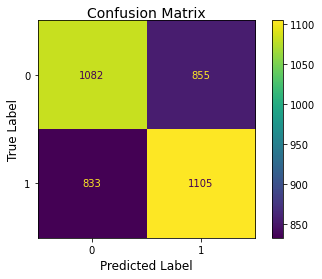

In [71]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,dt_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, dt_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14,pad=2)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

From the confusion matrix display, decision tree classifier rightly predicted 1082 clients charged off whiles it wrongly predicted 833 charged off who actually paid their loan. Again, the model rightly predicted 1105 clients fully paid their loan but wrongly predicted 855 clients fully paid who actually charged off.

### Random Forest

In [72]:
# instantiate the random forest classifier model and store it as rf
rf = RandomForestClassifier(random_state=42, n_estimators=130)

# Fit the random forest model to the train data
rf.fit(x_scaled_train,y_train)

# Make prediction from the validation data
rf_pred=rf.predict(x_scaled_validation)

print("------------------------------------")
# Find the train data set
print("The train set accuracy score: {:.3f}".format(rf.score(x_scaled_train, y_train)))
# Find the validation data set
print("The validation set accuracy score: {:.3f}".format(rf.score(x_scaled_validation, y_validation)))
# Find the accuracy.
# print("The accauracy score: {:.3f}" .format(accuracy_score(y_validation, pred)))
# Find the F1_score
print("The f1-score: {:.3f}".format(f1_score(y_validation,rf_pred)))
print("------------------------------------")

------------------------------------
The train set accuracy score: 1.000
The validation set accuracy score: 0.652
The f1-score: 0.650
------------------------------------


              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1937
           1       0.65      0.65      0.65      1938

    accuracy                           0.65      3875
   macro avg       0.65      0.65      0.65      3875
weighted avg       0.65      0.65      0.65      3875




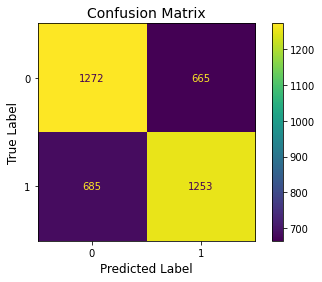

In [73]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,rf_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, rf_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

From the confusion matrix display, Random Forest classifier rightly predicted 1272 clients charged off whiles it wrongly predicted 685 charged off who actually paid their loan. Moreover, the model rightly predicted 1253 clients fully paid their loan but wrongly predicted 665 clients fully paid who actually charged off.

#### Hyperparameter tuning for the Random Forest

In [74]:
# List the parameters to be tuned using the gridsearchcv and store it as params
params = {"n_estimators":[70,100,130,150],
         "max_depth":[5,8,13,15,None],
         "max_features":[8,10,12]}

# Instatiate the GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=params,cv=5)

# Fit the gridsearch to the train data
grid_rf.fit(x_scaled_train, y_train)

# Find the best parameters
print("Best parameters:", grid_rf.best_params_)

# Make prediction from the best parameters
gridrf_pred = grid_rf.predict(x_scaled_validation)

print("----------------------------")
# Find the train data set
print("The train set: {:.3f}".format(grid_rf.score(x_scaled_train, y_train)))
# Find the validation data set
print("The validation set: {:.3f}".format(grid_rf.score(x_scaled_validation, y_validation)))
# Find the accuracy.
print("The accauracy score: {:.3f}" .format(accuracy_score(y_validation, gridrf_pred)))
# Find the F1_score
print("The f1-score: {:.3f}".format(f1_score(y_validation,gridrf_pred)))
print("----------------------------")

Best parameters: {'max_depth': 15, 'max_features': 12, 'n_estimators': 150}
----------------------------
The train set: 0.847
The validation set: 0.649
The accauracy score: 0.649
The f1-score: 0.652
----------------------------


              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1937
           1       0.65      0.66      0.65      1938

    accuracy                           0.65      3875
   macro avg       0.65      0.65      0.65      3875
weighted avg       0.65      0.65      0.65      3875




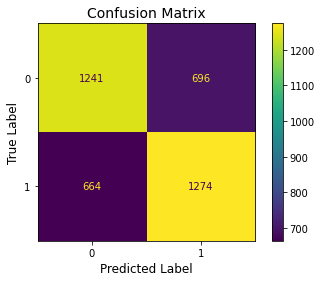

In [75]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,gridrf_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, gridrf_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

After hyperparameter tuning, the confusion matrix display indicates that the Random Forest classifier rightly predicted 1241 clients charged off whiles it wrongly predicted 696 charged off who actually paid their loan. Again, the model rightly predicted  1274 clients fully paid their loan, but wrongly predicted 696 clients fully paid who actually charged off.

### GradientBoosting

In [76]:
# Instatiate GradientBoost classifier
gb = GradientBoostingClassifier(random_state=130)

# Fit the gb model to train data
gb.fit(x_scaled_train, y_train)

# make prediction using the validation data
gb_pred = gb.predict(x_scaled_validation)

print("----------------------------")
# Find the train data set
print("The train set accuracy score: {:.3f}".format(gb.score(x_scaled_train, y_train)))
# Find the validation data set
print("The validation set accuracy score: {:.3f}".format(gb.score(x_scaled_validation, y_validation)))
# Find the accuracy.
# print("The accauracy score: {:.3f}" .format(accuracy_score(y_validation, pred)))
# Find the F1_score
print("The f1-score: {:.3f}".format(f1_score(y_validation,gb_pred)))
print("----------------------------")

----------------------------
The train set accuracy score: 0.669
The validation set accuracy score: 0.646
The f1-score: 0.650
----------------------------


              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1937
           1       0.64      0.66      0.65      1938

    accuracy                           0.65      3875
   macro avg       0.65      0.65      0.65      3875
weighted avg       0.65      0.65      0.65      3875




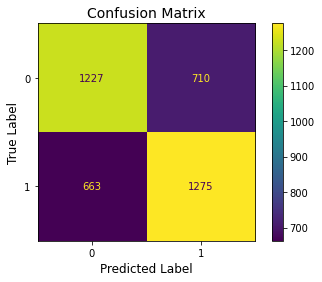

In [77]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,gb_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, gb_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

#### Hyperparameter tuning for GradientBoosting

In [78]:
# Set the parameters and store it as param
param = {"n_estimators":[60, 80, 128, 150,200],
        "max_depth":[2,3,4],
        "learning_rate":[0.01, 0.1, 1, 2.5, 5]}

# tune the hyperparameters using the gridsearch
ggb = GridSearchCV(estimator=gb, param_grid=param, cv=5)

# Fit the gridSearch to the train data
ggb.fit(x_scaled_train, y_train)

# Find the best parameters chosen
print("The best parameters:", ggb.best_params_)

# make prediction using the validation data
ggb_pred = ggb.predict(x_scaled_validation)


# Find the train set score
print("----------------------------------")
print("The train set accuaracy score: ",ggb.score(x_scaled_train, y_train).round(3))
# Find the accuracy score
print("The validation set accuracy score: {:.3f}".format(ggb.score(x_scaled_validation, y_validation)))
# Find the F1_score 
print("The F1 score score: {:.3f}".format(f1_score(y_validation, ggb_pred)))
print("----------------------------------")

The best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 128}
----------------------------------
The train set accuaracy score:  0.687
The validation set accuracy score: 0.651
The F1 score score: 0.652
----------------------------------


              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1937
           1       0.65      0.65      0.65      1938

    accuracy                           0.65      3875
   macro avg       0.65      0.65      0.65      3875
weighted avg       0.65      0.65      0.65      3875




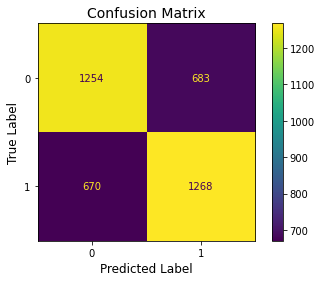

In [80]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,ggb_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, ggb_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

### Adaptive Boost(AdaBoost)

In [81]:
# Instantiate the Adaboostclassifier and store it as ad
ad = AdaBoostClassifier(random_state=130)

# Fit the model
ad.fit(x_scaled_train, y_train)

# Make prediction using the x_validation data
ad_pred = ad.predict(x_scaled_validation)

print("----------------------------")
# Find the score of the train scaled data
print("The train score: {:.3f}" .format(ad.score(x_scaled_train, y_train)))
print("The validation score: {:.3f}" .format(ad.score(x_scaled_validation,y_validation)))
# Find the F1_score
print("The F1 score is: {:.3f}".format(f1_score(y_validation,ad_pred)))
print("----------------------------")


----------------------------
The train score: 0.656
The validation score: 0.637
The F1 score is: 0.641
----------------------------


              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1937
           1       0.63      0.65      0.64      1938

    accuracy                           0.64      3875
   macro avg       0.64      0.64      0.64      3875
weighted avg       0.64      0.64      0.64      3875




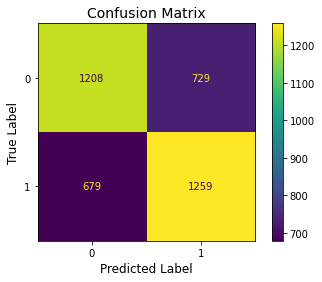

In [82]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,ad_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, ad_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

#### Hyperparameter tuning fro Adaboost

In [83]:
params = {"n_estimators":[30,50,65,90,120]}
grid_ad = GridSearchCV(estimator=ad, param_grid=params,cv=5)
grid_ad.fit(x_scaled_train, y_train)
gad_pred = grid_ad.predict(x_scaled_validation)
print("-------------------------")
print("Best parameters: ", grid_ad.best_params_)
print("Train set score: ", grid_ad.score(x_scaled_train, y_train).round(3))
print("Validation set score: ", grid_ad.score(x_scaled_validation, y_validation).round(3))
print("F1 score: ", f1_score(y_validation,gad_pred).round(3))
print("-------------------------------")

-------------------------
Best parameters:  {'n_estimators': 120}
Train set score:  0.662
Validation set score:  0.643
F1 score:  0.647
-------------------------------


              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1937
           1       0.64      0.65      0.65      1938

    accuracy                           0.64      3875
   macro avg       0.64      0.64      0.64      3875
weighted avg       0.64      0.64      0.64      3875




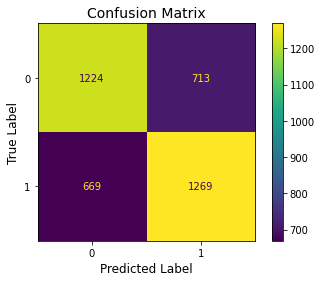

In [84]:
print("============================================================")
# Show the classification report of the raw adaboost
print(classification_report(y_validation,gad_pred))
print("============================================================")
print()
# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_validation, gad_pred)
# Title the confusion matrix
plt.title("Confusion Matrix",size=14)
# label the x-axis
plt.xlabel("Predicted Label",size=12)
# label the y axis
plt.ylabel("True Label", size=12)
# Display the plot
plt.show()

### Choosing the best model
[Return to the outline of tasks](#Outline-of-tasks)

#### Create a data frame for the models and their respective scores, and store it as model_score

In [85]:
model_score = pd.DataFrame({"Models":["Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"],
              
              # Create train test score column with its values
             "Train Test Score": [dt.score(x_scaled_train, y_train).round(3), grid_rf.score(x_scaled_train, y_train).round(3), 
                                  ggb.score(x_scaled_train,y_train).round(3),grid_ad.score(x_scaled_train, y_train).round(3)],
              
              # Create validation test score and its values
             "Validation Test Score": [dt.score(x_scaled_validation, y_validation).round(3), grid_rf.score(x_scaled_validation, y_validation).round(3),
                                      ggb.score(x_scaled_validation, y_validation).round(3), grid_ad.score(x_scaled_validation, y_validation).round(3)],
             
              # Create F1 score column with its values
             "F1 Score": [f1_score(y_validation,dt_pred).round(3), f1_score(y_validation, gridrf_pred).round(3),
                          f1_score(y_validation,ggb_pred).round(3), f1_score(y_validation, gad_pred).round(3)]})

In [86]:
# Display the scores of each model.
model_score

,Models,Train Test Score,Validation Test Score,F1 Score
0,Decision Tree,1.000,0.564,0.567
1,Random Forest,0.847,0.649,0.652
2,Gradient Boosting,0.687,0.651,0.652
3,AdaBoost,0.662,0.643,0.647


#### Create a new column named rank

In [87]:
# Sort the values in the F1 Score
model_score.sort_values(by="F1 Score", ascending=False, inplace=True)

# Create the Rank column
model_score["Rank"] = model_score["F1 Score"].rank(ascending=False).astype("int")
# Set the rank column as the index
model_score.set_index("Rank", inplace=True)

# show the table
model_score

,Models,Train Test Score,Validation Test Score,F1 Score
Rank,,,,
1,Random Forest,0.847,0.649,0.652
1,Gradient Boosting,0.687,0.651,0.652
3,AdaBoost,0.662,0.643,0.647
4,Decision Tree,1.000,0.564,0.567


From the model_score above, Random Forest and Gradient Boosting all had 0.652(65.2%) each. However, the validation score for Gradient boosting tops the rest with 0.651(65.1%). The train test score for gradient boosting at(0.687) is also close to the validation score, indicating the Gradient Boosting isn't likely to overfit unlike the Random Forest. For these reasons, the Gradient Boosting will be choosing as the best model.

### Finding the Important features from the best model
[Return to the outline of tasks](#Outline-of-tasks)

In [88]:
# Show the best estimator with it tuned parameters
print(ggb.best_estimator_)

GradientBoostingClassifier(max_depth=4, n_estimators=128, random_state=130)


In [89]:
# Using the best estimator, find the important features and store it as important_features
important_features = ggb.best_estimator_.feature_importances_

In [90]:
# create a dataframe for the important features and store it as essentials
essentials = pd.DataFrame({"Features":x.columns, "Importance":important_features})

# sort the essentials data by importance in descending order
essentials.sort_values(by="Importance", ascending=False,inplace=True)

In [91]:
essentials["Rank"] = essentials["Importance"].rank(ascending=False).astype("int")
# Set rank as index
essentials.set_index('Rank',inplace=True)
#Find the first 5
essentials

,Features,Importance
Rank,,
1,int_rate,0.525143
2,annual_inc,0.088734
3,dti,0.082017
4,term_ 60 months,0.049051
5,installment,0.040354
...,...,...
67,sub_grade_G4,0.000000
67,sub_grade_G2,0.000000
67,sub_grade_G1,0.000000


In [92]:
# round the importance values to 3 decimal places
essentials["Importance"] = essentials["Importance"].round(3)
# Find the first five important features the model used, and store it as important_five
important_five = essentials.head(5)

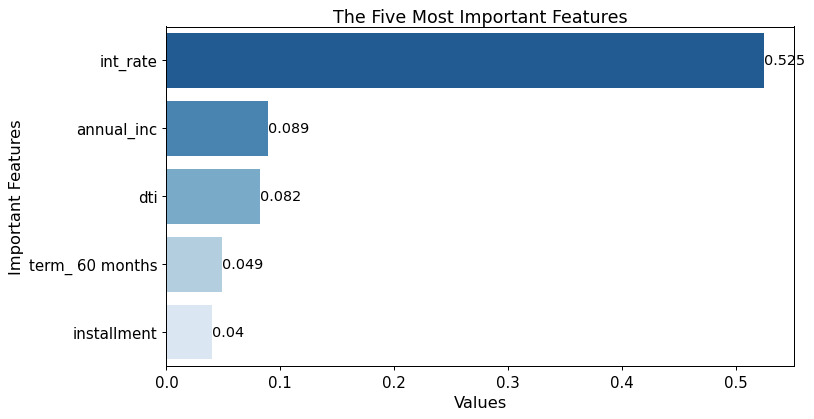

In [93]:
# Create a figure and increase its size
plt.figure(figsize=(9,5),dpi=90)
# plot the bargraph
annot = sns.barplot(data=important_five, x="Importance", y="Features", palette="Blues_r")

# Annotat the bars
annot.bar_label(annot.containers[0], size=11.5)
# Title the plot
plt.title("The Five Most Important Features", size=14, pad=2)
# Label the x-axis
plt.xlabel("Values", size=13)
# Label the y-axis 
plt.ylabel("Important Features",size=13)
# Increase the sizes of the xticks
plt.xticks(size=12)
# Increase the sizes of the yticks
plt.yticks(size=12)

# Display the plot
plt.show()

The above horizontal graph indicates that, interest rate is the most important feature with about (52.5%) used in building the model followed by the annual income and the dti (kindly read the full meaning of dti at the Data Overview at the beginning of the project) of the prospective client.

### Make prediction using the best model
[Return to Outline of tasks](#Outline-of-tasks)

In [96]:
# Make the prediction from the new data set (x_test)
model_prediction = ggb.predict(x_scaled_test)

In [97]:
# Add the prediction to the test data set as repayment status
x_test["repayment status"] = model_prediction

In [100]:
x_test["repayment status"] = x_test["repayment status"].map({1:"Fully Paid", 0:"Charged Off"})

In [101]:
x_test

,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,repayment status
266524,20.20,798.16,210000.0,13.30,1998,18.0,1.0,18857.0,88.9,33.0,...,1,0,0,0,0,0,0,1,0,Charged Off
1156,11.53,494.86,100000.0,9.85,1995,7.0,0.0,10325.0,84.6,31.0,...,1,0,0,0,0,0,1,1,0,Fully Paid
347948,10.99,333.89,105000.0,15.57,2000,8.0,0.0,42659.0,91.2,27.0,...,1,0,0,0,0,0,1,1,0,Fully Paid
223569,13.99,252.88,86000.0,13.60,1999,15.0,0.0,1839.0,18.2,34.0,...,1,0,0,0,0,0,0,1,0,Fully Paid
218416,13.33,203.12,36000.0,26.69,1991,16.0,0.0,15193.0,29.0,51.0,...,0,0,0,0,1,0,1,1,0,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377474,15.61,349.65,54000.0,19.49,1999,10.0,0.0,9796.0,85.2,16.0,...,1,0,0,0,0,0,0,1,0,Charged Off
76680,11.53,263.93,50000.0,9.63,2002,8.0,0.0,12809.0,59.9,19.0,...,1,0,0,0,0,0,1,1,0,Fully Paid
238353,22.99,634.16,131000.0,22.91,1973,13.0,0.0,26464.0,91.9,28.0,...,0,0,0,0,0,0,0,1,0,Charged Off
349978,24.99,469.53,68000.0,7.47,1995,10.0,1.0,8026.0,50.8,18.0,...,1,0,0,0,0,0,1,1,0,Charged Off


Thus, the model predicts that the client with index 266524 will charge off whiles client with index 1156 will fully pay the loan.

### Summary
[Return to outline of task](#Outline-of-tasks)

The projects began with balancing of the imported data so that the number of those who fully paid their debts was equal to the number of those who charged off. Exploratory Data Analysis, feature selection and data cleaning was carried out to get the data ready for model(s) development. Since the data demanded a computer with more computing power, only 25% of the balanced data was used for developing the model.  

The data was then grouped into features and label represent by x and y respectively. Afterwards, the features and labels were grouped into train, validation and test data sets. 

Since the management of the company also demanded the important features to consider in granting a loan, the Tree based algorithms were used.
The Decision Tree, Random Forest, Gradient Boosting and Adaptive Boosting classifiers were used. In the end, the best model chosen was the Gradient Boosting (after hyperparamter tuning). 

The five most important features to consider in granting a loan according to the model were; interest rate, annual income and dti of the prospective client, if the term of repayment is 60 months, and the installment amount to be paid.

### Thank you.